In [1]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.gridspec as gridspec

## Lorenz System

The Lorenz Equations are a system of three coupled, first-order, nonlinear differential equations which describe the trajectory of a particle through time. The system was originally derived by Lorenz as a model of atmospheric convection, but the deceptive simplicity of the equations have made them an often-used example in fields beyond atmospheric physics.

The equations describe the evolution of the spatial variables $x$, $y$, and $z$, given the governing parameters $\sigma$, $\beta$, and $\rho$, through the specification of the time-derivatives of the spatial variables:

\begin{eqnarray} 
\dot{x} &= &\sigma(y-x)\\ 
\dot{y} &= &(\rho-z)x - y\\ 
\dot{z} &= &xy-\beta z 
\end{eqnarray}

The resulting dynamics are entirely deterministic giving a starting point $(x_0, y_0, z_0)$ and a time interval $t$. Though it looks straightforward, for certain choices of the parameters $(\sigma, \rho, \beta)$, the trajectories become chaotic, and the resulting trajectories display some surprising properties. The system exhibits chaotic behaviour if all the three constants \($\sigma,\rho,\beta$) are set to specific values.

\begin{eqnarray} 
\sigma &= &10\\ 
\rho &= &28\\ 
\beta &= &\frac{8}{3} 
\end{eqnarray}

Though no general analytic solution exists for this system, the solutions can be computed numerically.  Python makes this sort of problem very easy to solve: one can simply use Scipy's interface to ODEPACK, an optimized Fortran package for solving ordinary differential equations.

The above three equations characterize how the state derivatives \($\dot{x},\dot{y},\dot{z}$) depend on \($x,y,z$) and the constants \($\sigma,\rho,\beta$)\. The function below implements this, set some initial conditions, decide on a time array to simulate over, and run the simulation using odeint().

Lorenz Attractor model is used to get simulated real-time vibration sensor data in a bearing.

In [2]:
def colorline3d(ax, x, y, z, cmap):
    N = len(x)
    skip = int(0.01*N)
    for i in range(0,N,skip):
        ax.plot(x[i:i+skip+1], y[i:i+skip+1], z[i:i+skip+1], color=cmap(int(255*i/N)))

    
# function that returns dx/dt
def f(x,t, sigma=10.0, beta=8.0/3.0, rho=28.0): # x is 3 x 1
        
    f1 = sigma*(x[1]-x[0])
    f2 = x[0]*(rho-x[2])-x[1]
    f3 = x[0]*x[1]-beta*x[2]
    f = np.array([f1,f2,f3])
    return f

def simulate(t_star, x0, noise, param_s=10.0, param_b=8.0/3.0, param_r=28.0):
    # solve ODE
    X_star = odeint(f, x0, t_star, args=(param_s, param_b, param_r))

    skip = 1
    dt = t_star[skip] - t_star[0]
    _data_sim = X_star[0::skip,:]
    _data_sim = _data_sim + noise*_data_sim.std(0)*np.random.randn(_data_sim.shape[0], _data_sim.shape[1])
    _data_sim = np.reshape(_data_sim, (_data_sim.shape[0],_data_sim.shape[1]))
    return _data_sim

# time points
time_points = np.arange(0,25,0.01)
    
# initial condition
x0 = np.array([-8.0, 7.0, 27])

_data_train = simulate(time_points, x0, 0)
_data_noise = simulate(time_points, x0, 0.3)
_data_test_one = simulate(time_points, x0, 0, 28.5, 2.2, 45)

## Visually inspect the data

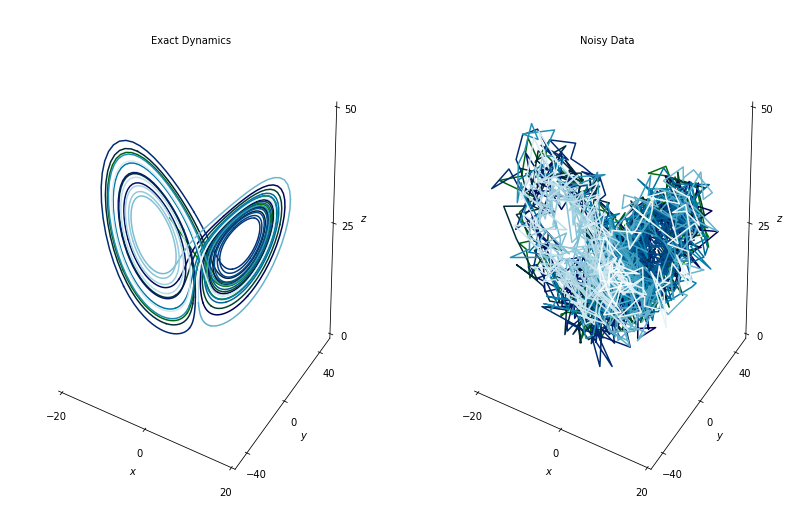

In [3]:
####### Plotting ################## 
def plotComparison(dataset1, title1, dataset2, title2):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    ax.axis('off')

    gs0 = gridspec.GridSpec(1, 2)
    gs0.update(top=0.95, bottom=0.1, left=0.0, right=0.90, wspace=0.15)

    ax = plt.subplot(gs0[:, 0:1], projection='3d')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    colorline3d(ax, dataset1[:,0], dataset1[:,1], dataset1[:,2], cmap = plt.cm.ocean)
    ax.grid(False)
    ax.set_xlim([-20,20])
    ax.set_ylim([-50,50])
    ax.set_zlim([0,50])
    ax.set_xticks([-20,0,20])
    ax.set_yticks([-40,0,40])
    ax.set_zticks([0,25,50])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title(title1, fontsize = 10)

    ax = plt.subplot(gs0[:, 1:2], projection='3d')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))    
    colorline3d(ax, dataset2[:,0], dataset2[:,1], dataset2[:,2], cmap = plt.cm.ocean)
    ax.grid(False)
    ax.set_xlim([-20,20])
    ax.set_ylim([-50,50])
    ax.set_zlim([0,50])
    ax.set_xticks([-20,0,20])
    ax.set_yticks([-40,0,40])
    ax.set_zticks([0,25,50])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title(title2, fontsize = 10)
    
plotComparison(_data_train, 'Exact Dynamics', _data_noise, 'Noisy Data')
plt.savefig('plots/Lorenz.png')

In [4]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, SimpleRNN
from keras.utils.vis_utils import plot_model
import pickle

/Users/ldalmeida/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
import tensorflow as tf
import tflearn
import tensorflow.contrib.layers as tflayers
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn
from complex_valued_models.ComplexRNN import ComplexRNNCell
from complex_valued_models.URNN import URNNCell

While this system oscillates between two semi-stable states, it is hard to identify any regular patterns

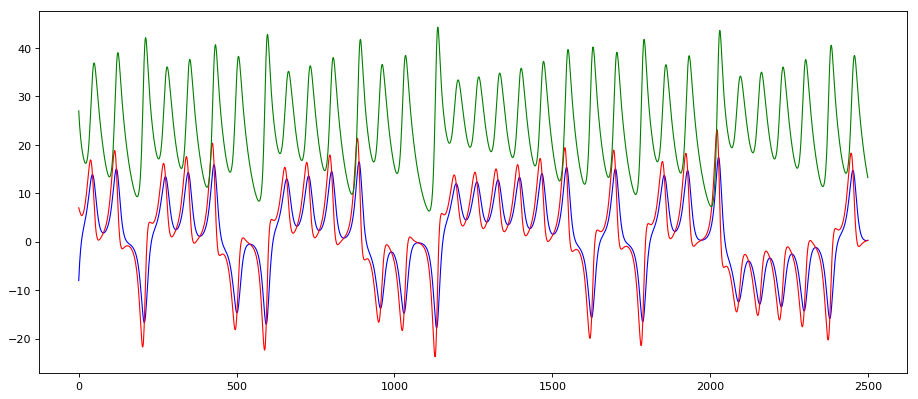

In [6]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(_data_train)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), _data_train[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), _data_train[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), _data_train[:,2], '-', color='green', animated = True, linewidth=1)

### Compare frequencies of healthy and noisy data

In [7]:
data_train_fft = np.fft.fft(_data_train)
data_noise_fft = np.fft.fft(_data_noise)

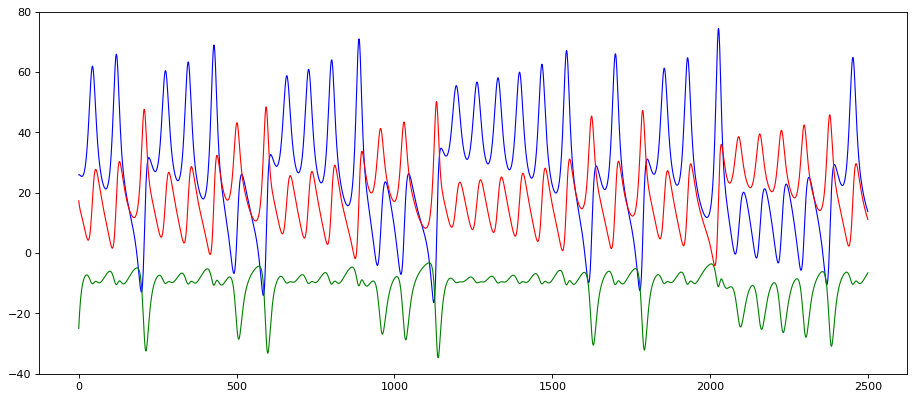

In [8]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_train_fft)
ax.plot(range(0,size), data_train_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_train_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_train_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

Note: I am plotting the imaginary part of the red dimension to see three lines because two dimensions on this dataset are completely overlapping in frequency and the real part is zero.

It is evident that there are lot of frequencies present in noisy signal.

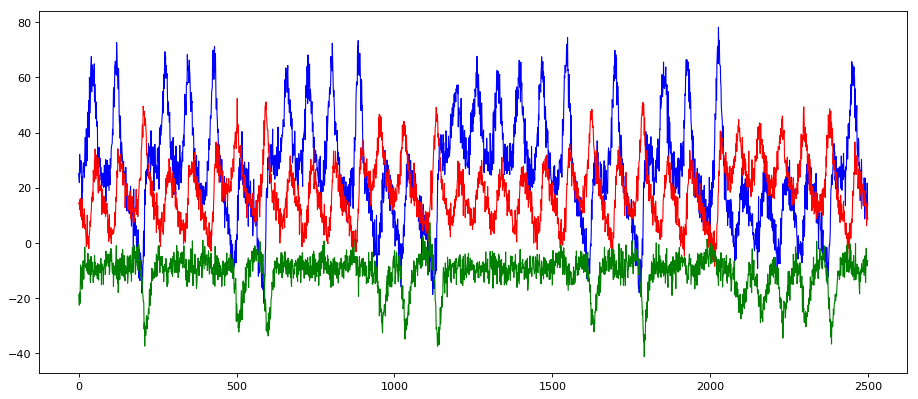

In [9]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_noise_fft)
ax.plot(range(0,size), data_noise_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_noise_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_noise_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

## Real valued neural networks

Based on research (the 2012 Stanford publication titled Deep Learning for Time Series Modeling by Enzo Busseti, Ian Osband, and Scott Wong), I will skip experimenting with deep feed-forward neural networks and directly start experimenting with a deep, recurrent neural network because it uses LSTM layers. Using LSTM layers is a way to introduce memory to neural networks that makes them ideal for analyzing time-series and sequence data.
### Data pre-processing for Keras neural networks

In [10]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(_data_train)
X_noise_scaled = scaler.transform(_data_noise)

LSTMs want their input to contain windows of times. This way instead of 2500 samples per dimension we have 250 batches of length 10. Here, the objective is given the last 10 time steps of the signal predict the future 10.

In [11]:
timesteps = 10
dim = 3
samples = 2500
X_train_scaled = X_train_scaled.reshape(int(samples/timesteps),timesteps,dim)
X_noise_scaled = X_noise_scaled.reshape(int(samples/timesteps),timesteps,dim)

In [23]:
losses = []
 
def handleLoss(loss):
        global losses
        losses+=[loss]
        print(loss)
 
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

### Simple Sequential Model

In [13]:
# Build neural network
def _simple_sequential_model():
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(timesteps,dim)))
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(3, activation='relu'))

    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='mse')
    return model

In [14]:
mod_1 = _simple_sequential_model()
print(mod_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10, 50)            200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10, 25)            1275      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 25)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 10, 3)             78        
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________
None


### Simple Recurrent Neural Network

In [15]:
# Build neural network
def _simple_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(Dense(3))
    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [16]:
mod_2 = _simple_rnn_model()
plot_model(mod_2, to_file='plots/model_plot.png', show_shapes=True, show_layer_names=True)
print(mod_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10, 50)            2700      
_________________________________________________________________
dense_4 (Dense)              (None, 10, 3)             153       
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________
None


### LSTM Neural Networks

In [43]:
from keras import regularizers
# design network
def _deep_lstm_model():
    model = Sequential()

    # test with 5 sequential layers
    # single layer with more units
    # weight reg and drop outs
    """model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True, dropout=0.2, 
                   bias_regularizer=regularizers.l1(0.01)))"""
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
    model.add(Dense(3))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [44]:
mod_3 = _deep_lstm_model()
print(mod_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 50)            10800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dense_5 (Dense)              (None, 10, 3)             153       
Total params: 91,753
Trainable params: 91,753
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
mod_3.fit(X_train_scaled, X_train_scaled,
        validation_data = (X_train_scaled, X_train_scaled),
        epochs = 50, batch_size = 72, callbacks = [LossHistory()], shuffle = False)

The test and train phase of neural network is done twenty times with actual data and one time with noisy data. A spike is observed whenever the actual data pre-trained neural network sees noisy data. 

In [45]:
for i in range(20):
     
    print("----------------actual samples")
    mod_3.fit(X_train_scaled, X_train_scaled,
        validation_data = (X_train_scaled, X_train_scaled),
        epochs = 50, batch_size = 72, callbacks = [LossHistory()], shuffle = False)
    yhat_healthy = mod_3.predict(X_train_scaled)
    yhat_broken = mod_3.predict(X_noise_scaled)
    X_train_scaled.shape = (int(samples/timesteps),timesteps,dim)
    X_noise_scaled.shape = (int(samples/timesteps),timesteps,dim)

print("----------------noise")
mod_3.fit(X_noise_scaled, X_noise_scaled,
        validation_data = (X_noise_scaled, X_noise_scaled),
        epochs = 50, batch_size = 72, callbacks = [LossHistory()], shuffle = False)
yhat_healthy = mod_3.predict(X_train_scaled)
yhat_broken = mod_3.predict(X_noise_scaled)
X_train_scaled.shape = (int(samples/timesteps),timesteps,dim)
X_noise_scaled.shape = (int(samples/timesteps),timesteps,dim)


----------------actual samples
Train on 250 samples, validate on 250 samples
Epoch 1/50
 72/250 [=======>......................] - ETA: 8s - loss: 0.32250.3225373
0.3249464
216/250 [========================>.....] - ETA: 0s - loss: 0.31370.2935672
0.20983653
250/250 [==============================] - 4s 16ms/step - loss: 0.2996 - val_loss: 0.2738
Epoch 2/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.28680.28683847
0.28236878
216/250 [========================>.....] - ETA: 0s - loss: 0.27290.2493541
0.17008989
250/250 [==============================] - 0s 817us/step - loss: 0.2589 - val_loss: 0.2173
Epoch 3/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.22820.22824359
0.21471967
216/250 [========================>.....] - ETA: 0s - loss: 0.20770.18018883
0.11633686
250/250 [==============================] - 0s 813us/step - loss: 0.1953 - val_loss: 0.1468
Epoch 4/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.15390.15385374
0.15005916
21

Epoch 9/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01230.01228671
0.011577793
216/250 [========================>.....] - ETA: 0s - loss: 0.01190.011758355
0.009553548
250/250 [==============================] - 0s 792us/step - loss: 0.0116 - val_loss: 0.0109
Epoch 10/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01120.011217328
0.01143689
216/250 [========================>.....] - ETA: 0s - loss: 0.01120.010980161
0.00919617
250/250 [==============================] - 0s 819us/step - loss: 0.0109 - val_loss: 0.0108
Epoch 11/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01110.011147109
0.010757975
216/250 [========================>.....] - ETA: 0s - loss: 0.01090.010844345
0.00888188
250/250 [==============================] - 0s 850us/step - loss: 0.0106 - val_loss: 0.0103
Epoch 12/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.01060.010627118
0.010448026
216/250 [========================>.....] - ETA: 0s - loss: 0.

Epoch 17/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00220.0022328445
0.0019517057
216/250 [========================>.....] - ETA: 0s - loss: 0.00210.0021707963
0.0023352122
250/250 [==============================] - 0s 826us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 18/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00220.0021891699
0.001909377
216/250 [========================>.....] - ETA: 0s - loss: 0.00210.002125486
0.0022903394
250/250 [==============================] - 0s 832us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 19/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00210.0021488625
0.0018701045
216/250 [========================>.....] - ETA: 0s - loss: 0.00200.0020828596
0.0022471733
250/250 [==============================] - 0s 847us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 20/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00210.0021131842
0.0018347589
216/250 [========================>.....] - E

Epoch 46/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00140.0014249636
0.0011679935
216/250 [========================>.....] - ETA: 0s - loss: 0.00130.001335046
0.00141315
250/250 [==============================] - 0s 870us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 47/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00140.0014143732
0.0011487119
216/250 [========================>.....] - ETA: 0s - loss: 0.00130.0013217558
0.0013893959
250/250 [==============================] - 0s 881us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 48/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00140.0013983778
0.001130464
216/250 [========================>.....] - ETA: 0s - loss: 0.00130.0013032955
0.0013668581
250/250 [==============================] - 0s 819us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 49/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00140.001381624
0.0011127559
216/250 [========================>.....] - ETA:

 72/250 [=======>......................] - ETA: 0s - loss: 8.2092e-040.00082091906
0.0005764465
216/250 [========================>.....] - ETA: 0s - loss: 6.8897e-040.0006695343
0.0006002763
250/250 [==============================] - 0s 878us/step - loss: 6.7690e-04 - val_loss: 7.4692e-04
Epoch 2/50
 72/250 [=======>......................] - ETA: 0s - loss: 8.4431e-040.00084431056
0.0005805478
216/250 [========================>.....] - ETA: 0s - loss: 7.0263e-040.0006830407
0.00059669826
250/250 [==============================] - 0s 902us/step - loss: 6.8823e-04 - val_loss: 7.7214e-04
Epoch 3/50
 72/250 [=======>......................] - ETA: 0s - loss: 8.7183e-040.0008718297
0.00058378186
216/250 [========================>.....] - ETA: 0s - loss: 7.1851e-040.00069992425
0.0005925349
250/250 [==============================] - 0s 885us/step - loss: 7.0138e-04 - val_loss: 7.9854e-04
Epoch 4/50
 72/250 [=======>......................] - ETA: 0s - loss: 9.0039e-040.00090038526
0.0005838692

Epoch 5/50
 72/250 [=======>......................] - ETA: 0s - loss: 6.3221e-040.0006322084
0.0004686414
216/250 [========================>.....] - ETA: 0s - loss: 5.1954e-040.00045777936
0.0004261968
250/250 [==============================] - 0s 817us/step - loss: 5.0685e-04 - val_loss: 5.7856e-04
Epoch 6/50
 72/250 [=======>......................] - ETA: 0s - loss: 6.7961e-040.00067960855
0.0005138196
216/250 [========================>.....] - ETA: 0s - loss: 5.5910e-040.00048387662
0.00044606987
250/250 [==============================] - 0s 807us/step - loss: 5.4373e-04 - val_loss: 6.4501e-04
Epoch 7/50
 72/250 [=======>......................] - ETA: 0s - loss: 7.5129e-040.0007512918
0.0005677369
216/250 [========================>.....] - ETA: 0s - loss: 6.1396e-040.00052284385
0.00047666946
250/250 [==============================] - 0s 806us/step - loss: 5.9529e-04 - val_loss: 7.2336e-04
Epoch 8/50
 72/250 [=======>......................] - ETA: 0s - loss: 8.3706e-040.00083705824


Epoch 9/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.9380e-040.0004937968
0.00028229898
216/250 [========================>.....] - ETA: 0s - loss: 4.0037e-040.00042500088
0.0004981188
250/250 [==============================] - 0s 817us/step - loss: 4.1366e-04 - val_loss: 4.0839e-04
Epoch 10/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.8824e-040.00048823576
0.000283145
216/250 [========================>.....] - ETA: 0s - loss: 3.8329e-040.0003784965
0.0004043166
250/250 [==============================] - 0s 857us/step - loss: 3.8615e-04 - val_loss: 3.8305e-04
Epoch 11/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.6244e-040.00046244037
0.00028059058
216/250 [========================>.....] - ETA: 0s - loss: 3.5913e-040.00033435412
0.00034499238
250/250 [==============================] - 0s 800us/step - loss: 3.5721e-04 - val_loss: 3.5603e-04
Epoch 12/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.2946e-040.000429461

Epoch 36/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.5602e-040.00035601563
0.0002451382
216/250 [========================>.....] - ETA: 0s - loss: 2.9155e-040.00027349227
0.00024428885
250/250 [==============================] - 0s 823us/step - loss: 2.8512e-04 - val_loss: 2.8506e-04
Epoch 37/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.5460e-040.0003545964
0.00024503257
216/250 [========================>.....] - ETA: 0s - loss: 2.9054e-040.0002719922
0.00024387063
250/250 [==============================] - 0s 858us/step - loss: 2.8419e-04 - val_loss: 2.8412e-04
Epoch 38/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.5372e-040.0003537208
0.00024545414
216/250 [========================>.....] - ETA: 0s - loss: 2.8997e-040.0002707335
0.00024357687
250/250 [==============================] - 0s 852us/step - loss: 2.8366e-04 - val_loss: 2.8504e-04
Epoch 39/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.5488e-040.0003548

Epoch 13/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.9143e-040.0003914254
0.0003044102
216/250 [========================>.....] - ETA: 0s - loss: 3.2737e-040.0002862643
0.0002666725
250/250 [==============================] - 0s 896us/step - loss: 3.1911e-04 - val_loss: 3.4142e-04
Epoch 14/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.1651e-040.00041650984
0.00032834982
216/250 [========================>.....] - ETA: 0s - loss: 3.4629e-040.00029401958
0.00028434125
250/250 [==============================] - 0s 818us/step - loss: 3.3787e-04 - val_loss: 3.5674e-04
Epoch 15/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.3294e-040.00043294486
0.00035950288
216/250 [========================>.....] - ETA: 0s - loss: 3.6542e-040.00030382455
0.0002970197
250/250 [==============================] - 0s 810us/step - loss: 3.5612e-04 - val_loss: 3.9819e-04
Epoch 16/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.7803e-040.0004780

Epoch 17/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.3794e-040.00033793953
0.00021764713
216/250 [========================>.....] - ETA: 0s - loss: 3.0074e-040.00034663524
0.0003271575
250/250 [==============================] - 0s 851us/step - loss: 3.0433e-04 - val_loss: 3.0013e-04
Epoch 18/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.6823e-040.00036823034
0.00021870554
216/250 [========================>.....] - ETA: 0s - loss: 3.1276e-040.00035134293
0.000337876
250/250 [==============================] - 0s 868us/step - loss: 3.1618e-04 - val_loss: 2.7415e-04
Epoch 19/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.3926e-040.0003392643
0.00020487969
216/250 [========================>.....] - ETA: 0s - loss: 2.9245e-040.00033319817
0.00034984437
250/250 [==============================] - 0s 846us/step - loss: 3.0025e-04 - val_loss: 2.8529e-04
Epoch 20/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.5133e-040.000351

Epoch 44/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.0141e-040.00040141473
0.00019474042
216/250 [========================>.....] - ETA: 0s - loss: 2.9409e-040.00028612552
0.00017709123
250/250 [==============================] - 0s 827us/step - loss: 2.7818e-04 - val_loss: 3.1969e-04
Epoch 45/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.8424e-040.0003842372
0.00018816018
216/250 [========================>.....] - ETA: 0s - loss: 2.8265e-040.00027556164
0.00017376723
250/250 [==============================] - 0s 827us/step - loss: 2.6784e-04 - val_loss: 2.9989e-04
Epoch 46/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.6273e-040.000362734
0.00018392093
216/250 [========================>.....] - ETA: 0s - loss: 2.6895e-040.0002602041
0.00017432228
250/250 [==============================] - 0s 863us/step - loss: 2.5608e-04 - val_loss: 2.7274e-04
Epoch 47/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.3316e-040.000333

Epoch 21/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.4587e-040.00024586773
0.00016773625
216/250 [========================>.....] - ETA: 0s - loss: 1.9757e-040.0001791108
0.00016457074
250/250 [==============================] - 0s 803us/step - loss: 1.9308e-04 - val_loss: 1.8961e-04
Epoch 22/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.4281e-040.00024281023
0.00017088663
216/250 [========================>.....] - ETA: 0s - loss: 1.9732e-040.00017827167
0.00016497605
250/250 [==============================] - 0s 851us/step - loss: 1.9292e-04 - val_loss: 1.9839e-04
Epoch 23/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.5288e-040.00025287597
0.00017420684
216/250 [========================>.....] - ETA: 0s - loss: 2.0368e-040.00018397158
0.0001682358
250/250 [==============================] - 0s 837us/step - loss: 1.9886e-04 - val_loss: 2.0613e-04
Epoch 24/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.6122e-040.0002

 72/250 [=======>......................] - ETA: 0s - loss: 2.1408e-040.000214077
0.00013979198
216/250 [========================>.....] - ETA: 0s - loss: 1.6871e-040.00015226816
0.00013771636
250/250 [==============================] - 0s 816us/step - loss: 1.6450e-04 - val_loss: 1.6606e-04
Epoch 25/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.1524e-040.00021523527
0.00014060504
216/250 [========================>.....] - ETA: 0s - loss: 1.6960e-040.00015295114
0.00013869321
250/250 [==============================] - 0s 811us/step - loss: 1.6539e-04 - val_loss: 1.6572e-04
Epoch 26/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.1483e-040.00021483384
0.00014104672
216/250 [========================>.....] - ETA: 0s - loss: 1.6941e-040.00015233477
0.00013828406
250/250 [==============================] - 0s 812us/step - loss: 1.6517e-04 - val_loss: 1.6747e-04
Epoch 27/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.1666e-040.00021666136
0.00

----------------actual samples
Train on 250 samples, validate on 250 samples
Epoch 1/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.0838e-040.00020837825
0.00013542193
216/250 [========================>.....] - ETA: 0s - loss: 1.6512e-040.00015156397
0.00013058344
250/250 [==============================] - 0s 800us/step - loss: 1.6042e-04 - val_loss: 1.7309e-04
Epoch 2/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.2043e-040.00022042579
0.00013274017
216/250 [========================>.....] - ETA: 0s - loss: 1.7175e-040.00016207604
0.00012819326
250/250 [==============================] - 0s 818us/step - loss: 1.6582e-04 - val_loss: 1.8096e-04
Epoch 3/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.2854e-040.00022853642
0.00012936977
216/250 [========================>.....] - ETA: 0s - loss: 1.7531e-040.00016803663
0.00012662326
250/250 [==============================] - 0s 843us/step - loss: 1.6869e-04 - val_loss: 1.8008e-04
Epoch 4/50


Epoch 4/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.8037e-040.00018036512
0.00011287666
216/250 [========================>.....] - ETA: 0s - loss: 1.4077e-040.00012908004
0.000112853035
250/250 [==============================] - 0s 880us/step - loss: 1.3698e-04 - val_loss: 1.3580e-04
Epoch 5/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.7775e-040.00017774718
0.00011259483
216/250 [========================>.....] - ETA: 0s - loss: 1.3954e-040.00012828285
0.000113092654
250/250 [==============================] - 0s 825us/step - loss: 1.3594e-04 - val_loss: 1.3743e-04
Epoch 6/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.7955e-040.0001795504
0.00011266429
216/250 [========================>.....] - ETA: 0s - loss: 1.4042e-040.000129037
0.00011307717
250/250 [==============================] - 0s 833us/step - loss: 1.3670e-04 - val_loss: 1.3475e-04
Epoch 7/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.7650e-040.0001765

Epoch 31/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.5886e-040.00025885843
0.00011319622
216/250 [========================>.....] - ETA: 0s - loss: 1.8530e-040.00018383285
0.00018284832
250/250 [==============================] - 0s 822us/step - loss: 1.8496e-04 - val_loss: 1.7712e-04
Epoch 32/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.1947e-040.00021946829
0.000110433175
216/250 [========================>.....] - ETA: 0s - loss: 1.6423e-040.0001628009
0.00014547339
250/250 [==============================] - 0s 845us/step - loss: 1.6168e-04 - val_loss: 1.8132e-04
Epoch 33/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.2697e-040.00022697139
0.00010962601
216/250 [========================>.....] - ETA: 0s - loss: 1.6332e-040.00015335776
0.00013659043
250/250 [==============================] - 0s 819us/step - loss: 1.5968e-04 - val_loss: 1.4652e-04
Epoch 34/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.8697e-040.00

250/250 [==============================] - 0s 801us/step - loss: 2.0521e-04 - val_loss: 2.8163e-04
Epoch 8/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.3262e-040.0003326206
0.00020081809
216/250 [========================>.....] - ETA: 0s - loss: 2.4902e-040.00021361966
0.00014770094
250/250 [==============================] - 0s 814us/step - loss: 2.3524e-04 - val_loss: 3.3565e-04
Epoch 9/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.9027e-040.00039027067
0.00021840855
216/250 [========================>.....] - ETA: 0s - loss: 2.8813e-040.00025570643
0.00015196318
250/250 [==============================] - 0s 823us/step - loss: 2.6961e-04 - val_loss: 4.0081e-04
Epoch 10/50
 72/250 [=======>......................] - ETA: 0s - loss: 4.5973e-040.00045973243
0.00022541828
216/250 [========================>.....] - ETA: 0s - loss: 3.3172e-040.00031001956
0.00015143899
250/250 [==============================] - 0s 832us/step - loss: 3.0720e-04 - val_loss: 

144/250 [================>.............] - ETA: 0s - loss: 1.1781e-049.050744e-05
0.00010166729
8.6799526e-05
250/250 [==============================] - 0s 876us/step - loss: 1.0894e-04 - val_loss: 1.0986e-04
Epoch 12/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4550e-040.00014550326
9.1082795e-05
216/250 [========================>.....] - ETA: 0s - loss: 1.1282e-040.00010186496
8.7049535e-05
250/250 [==============================] - 0s 820us/step - loss: 1.0931e-04 - val_loss: 1.1061e-04
Epoch 13/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4629e-040.00014628597
9.196412e-05
216/250 [========================>.....] - ETA: 0s - loss: 1.1349e-040.000102207785
8.7564054e-05
250/250 [==============================] - 0s 823us/step - loss: 1.0996e-04 - val_loss: 1.1147e-04
Epoch 14/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4719e-040.00014718728
9.319762e-05
216/250 [========================>.....] - ETA: 0s - loss: 1.1436e-040.00

Epoch 38/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.6984e-040.0001698362
0.00010792231
216/250 [========================>.....] - ETA: 0s - loss: 1.3242e-040.00011951593
0.00010240429
250/250 [==============================] - 0s 820us/step - loss: 1.2834e-04 - val_loss: 1.0839e-04
Epoch 39/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4192e-040.00014191953
0.00011969233
216/250 [========================>.....] - ETA: 0s - loss: 1.2282e-040.00010683806
0.00010174114
250/250 [==============================] - 0s 792us/step - loss: 1.1995e-04 - val_loss: 1.3837e-04
Epoch 40/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.7637e-040.00017637125
0.00011764662
216/250 [========================>.....] - ETA: 0s - loss: 1.4487e-040.00014059873
9.805779e-05
250/250 [==============================] - 0s 826us/step - loss: 1.3851e-04 - val_loss: 1.8296e-04
Epoch 41/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.2476e-040.0002

Epoch 15/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.3857e-040.00013857262
0.00010018645
216/250 [========================>.....] - ETA: 0s - loss: 1.2533e-040.00013722808
0.000112384296
250/250 [==============================] - 0s 822us/step - loss: 1.2357e-04 - val_loss: 1.0970e-04
Epoch 16/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4335e-040.00014334702
0.00010064577
216/250 [========================>.....] - ETA: 0s - loss: 1.2959e-040.00014478253
0.0001253441
250/250 [==============================] - 0s 779us/step - loss: 1.2901e-04 - val_loss: 1.1088e-04
Epoch 17/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4464e-040.00014464429
0.00010756635
216/250 [========================>.....] - ETA: 0s - loss: 1.3695e-040.00015864227
0.00013173433
250/250 [==============================] - 0s 850us/step - loss: 1.3624e-04 - val_loss: 1.1804e-04
Epoch 18/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.5246e-040.00

Epoch 42/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2776e-040.00012776269
7.800252e-05
216/250 [========================>.....] - ETA: 0s - loss: 9.7997e-058.822537e-05
7.1563525e-05
250/250 [==============================] - 0s 908us/step - loss: 9.4402e-05 - val_loss: 9.6431e-05
Epoch 43/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2841e-040.0001284066
7.839314e-05
216/250 [========================>.....] - ETA: 0s - loss: 9.8298e-058.809517e-05
7.190463e-05
250/250 [==============================] - 0s 867us/step - loss: 9.4709e-05 - val_loss: 9.6962e-05
Epoch 44/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2892e-040.00012891633
7.895718e-05
216/250 [========================>.....] - ETA: 0s - loss: 9.8889e-058.8793386e-05
7.1749426e-05
250/250 [==============================] - 0s 834us/step - loss: 9.5198e-05 - val_loss: 9.8879e-05
Epoch 45/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.3097e-040.000130965

Epoch 19/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2631e-040.00012630993
7.71519e-05
216/250 [========================>.....] - ETA: 0s - loss: 9.7277e-058.8368586e-05
7.009457e-05
250/250 [==============================] - 0s 825us/step - loss: 9.3580e-05 - val_loss: 8.9832e-05
Epoch 20/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2023e-040.00012022826
7.993384e-05
216/250 [========================>.....] - ETA: 0s - loss: 9.4359e-058.2913706e-05
7.1345494e-05
250/250 [==============================] - 0s 834us/step - loss: 9.1229e-05 - val_loss: 9.0544e-05
Epoch 21/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2131e-040.0001213103
8.184498e-05
216/250 [========================>.....] - ETA: 0s - loss: 9.5645e-058.3778534e-05
7.1499e-05
250/250 [==============================] - 0s 836us/step - loss: 9.2361e-05 - val_loss: 9.7081e-05
Epoch 22/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2850e-040.00012850018

Epoch 46/50
 72/250 [=======>......................] - ETA: 0s - loss: 3.7168e-040.0003716793
8.426875e-05
216/250 [========================>.....] - ETA: 0s - loss: 2.5132e-040.0002980022
7.535554e-05
250/250 [==============================] - 0s 899us/step - loss: 2.2739e-04 - val_loss: 2.4354e-04
Epoch 47/50
 72/250 [=======>......................] - ETA: 0s - loss: 2.8331e-040.00028331377
9.260479e-05
216/250 [========================>.....] - ETA: 0s - loss: 1.9097e-040.00019700087
9.2048256e-05
250/250 [==============================] - 0s 842us/step - loss: 1.7752e-04 - val_loss: 1.2292e-04
Epoch 48/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.5369e-040.00015368732
0.00011570211
216/250 [========================>.....] - ETA: 0s - loss: 1.2280e-049.9013414e-05
9.478075e-05
250/250 [==============================] - 0s 824us/step - loss: 1.1899e-04 - val_loss: 9.6609e-05
Epoch 49/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.2698e-040.00012698

Epoch 23/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.0681e-040.00010681367
6.380914e-05
216/250 [========================>.....] - ETA: 0s - loss: 8.1552e-057.403417e-05
5.716741e-05
250/250 [==============================] - 0s 801us/step - loss: 7.8236e-05 - val_loss: 7.7976e-05
Epoch 24/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.0608e-040.00010607857
6.365291e-05
216/250 [========================>.....] - ETA: 0s - loss: 8.1059e-057.344687e-05
5.698553e-05
250/250 [==============================] - 0s 861us/step - loss: 7.7785e-05 - val_loss: 7.7590e-05
Epoch 25/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.0565e-040.000105647974
6.343887e-05
216/250 [========================>.....] - ETA: 0s - loss: 8.0719e-057.307065e-05
5.6788107e-05
250/250 [==============================] - 0s 842us/step - loss: 7.7465e-05 - val_loss: 7.7403e-05
Epoch 26/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.0543e-040.000105431

 72/250 [=======>......................] - ETA: 0s - loss: 1.3656e-040.00013656152
7.243865e-05
216/250 [========================>.....] - ETA: 0s - loss: 1.0035e-049.206209e-05
5.8759553e-05
250/250 [==============================] - 0s 835us/step - loss: 9.4697e-05 - val_loss: 1.1099e-04
----------------actual samples
Train on 250 samples, validate on 250 samples
Epoch 1/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4027e-040.0001402741
7.332816e-05
216/250 [========================>.....] - ETA: 0s - loss: 1.0275e-049.463828e-05
5.8886246e-05
250/250 [==============================] - 0s 824us/step - loss: 9.6782e-05 - val_loss: 1.1542e-04
Epoch 2/50
 72/250 [=======>......................] - ETA: 0s - loss: 1.4490e-040.00014489543
7.398097e-05
216/250 [========================>.....] - ETA: 0s - loss: 1.0551e-049.7668024e-05
5.9092294e-05
250/250 [==============================] - 0s 854us/step - loss: 9.9201e-05 - val_loss: 1.1850e-04
Epoch 3/50
 72/250 [=======>

250/250 [==============================] - 0s 814us/step - loss: 7.5002e-05 - val_loss: 6.9044e-05
Epoch 27/50
 72/250 [=======>......................] - ETA: 0s - loss: 9.4737e-059.473705e-05
6.269447e-05
216/250 [========================>.....] - ETA: 0s - loss: 7.8307e-057.748833e-05
5.7260262e-05
250/250 [==============================] - 0s 789us/step - loss: 7.5444e-05 - val_loss: 7.2445e-05
Epoch 28/50
 72/250 [=======>......................] - ETA: 0s - loss: 9.7885e-059.788509e-05
6.5577304e-05
216/250 [========================>.....] - ETA: 0s - loss: 8.2355e-058.360228e-05
5.9688264e-05
250/250 [==============================] - 0s 888us/step - loss: 7.9272e-05 - val_loss: 7.1489e-05
Epoch 29/50
 72/250 [=======>......................] - ETA: 0s - loss: 9.7170e-059.716976e-05
6.803856e-05
216/250 [========================>.....] - ETA: 0s - loss: 8.3843e-058.6319895e-05
6.310121e-05
250/250 [==============================] - 0s 824us/step - loss: 8.1022e-05 - val_loss: 7.665

216/250 [========================>.....] - ETA: 0s - loss: 7.0547e-056.0665338e-05
5.063102e-05
250/250 [==============================] - 0s 848us/step - loss: 6.7839e-05 - val_loss: 6.3068e-05
Epoch 31/50
 72/250 [=======>......................] - ETA: 0s - loss: 8.6866e-058.6865766e-05
6.1208586e-05
216/250 [========================>.....] - ETA: 0s - loss: 7.0307e-056.284554e-05
4.61511e-05
250/250 [==============================] - 0s 908us/step - loss: 6.7021e-05 - val_loss: 7.3461e-05
Epoch 32/50
 72/250 [=======>......................] - ETA: 0s - loss: 9.8121e-059.812081e-05
6.60413e-05
216/250 [========================>.....] - ETA: 0s - loss: 7.5731e-056.3031e-05
5.677642e-05
250/250 [==============================] - 0s 843us/step - loss: 7.3153e-05 - val_loss: 6.6589e-05
Epoch 33/50
216/250 [========================>.....] - ETA: 0s - loss: 7.5830e-056.636716e-05
5.067127e-05
250/250 [==============================] - 0s 917us/step - loss: 7.2409e-05 - val_loss: 8.2507e-05

250/250 [==============================] - 0s 875us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 36/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00180.0018150831
0.001725111
216/250 [========================>.....] - ETA: 0s - loss: 0.00180.001720007
0.0016723183
250/250 [==============================] - 0s 866us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 37/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00180.0017913973
0.0016940383
216/250 [========================>.....] - ETA: 0s - loss: 0.00170.0016830725
0.0016358644
250/250 [==============================] - 0s 853us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 38/50
 72/250 [=======>......................] - ETA: 0s - loss: 0.00180.0017629915
0.0016623911
216/250 [========================>.....] - ETA: 0s - loss: 0.00170.0016473626
0.0016031367
250/250 [==============================] - 0s 849us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 39/50
 72/250 [=======>......................] - E

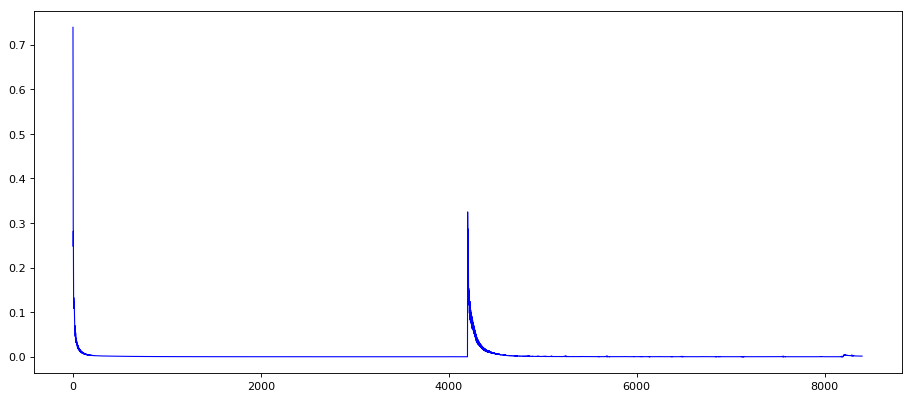

In [46]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(X_train_scaled)
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

### Test Datasets

In [79]:
# initial condition
def testDynamics(test_data):
    X_test_scaled = scaler.transform(test_data)
    X_test_scaled = X_test_scaled.reshape(int(samples/timesteps),timesteps,dim)
    yhat_predict = mod_3.predict(X_test_scaled)
    yhat_predict = yhat_predict.reshape(samples,dim)
    yhat_rescaled = scaler.inverse_transform(yhat_predict)
    plotComparison(test_data, 'Exact Dynamics', yhat_rescaled, ' Real-valued Deep LSTM')
    mse = mean_squared_error(test_data, yhat_rescaled)
    print("MSE:%.2f" % mse)

MSE:0.47


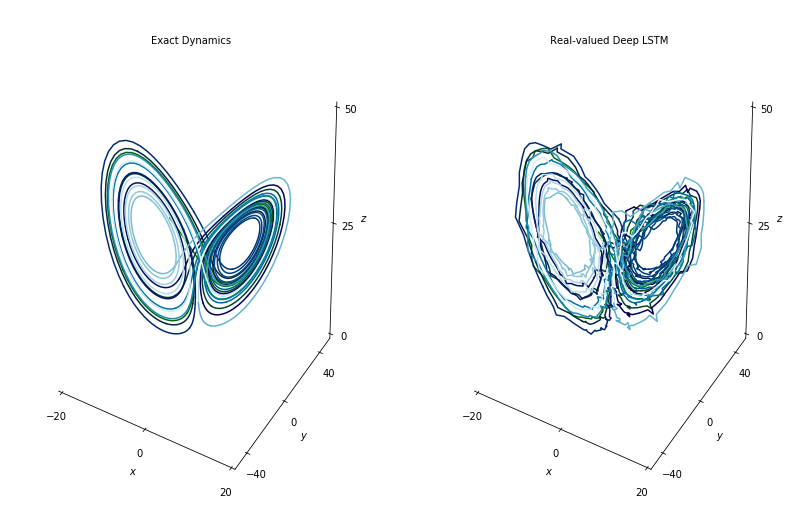

In [80]:
testDynamics(_data_train)

MSE:10.75


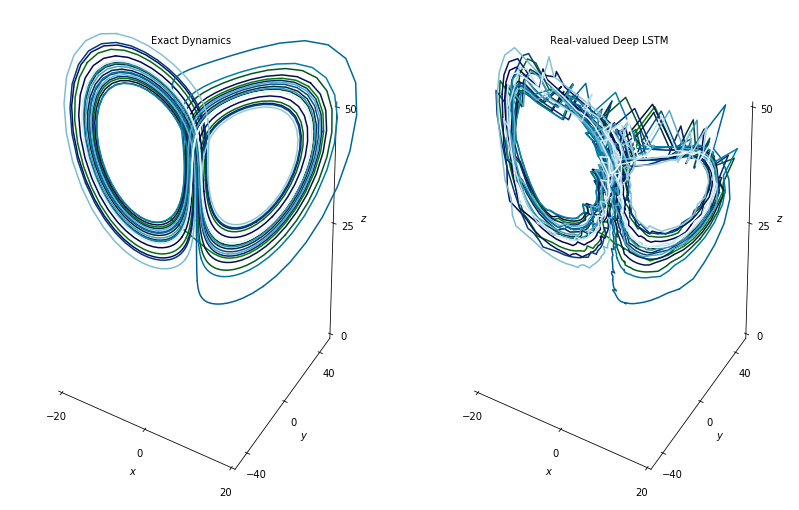

In [81]:
_data_test_one = simulate(time_points, x0, 0, 28.5, 2.2, 45)
testDynamics(_data_test_one)

MSE:0.43


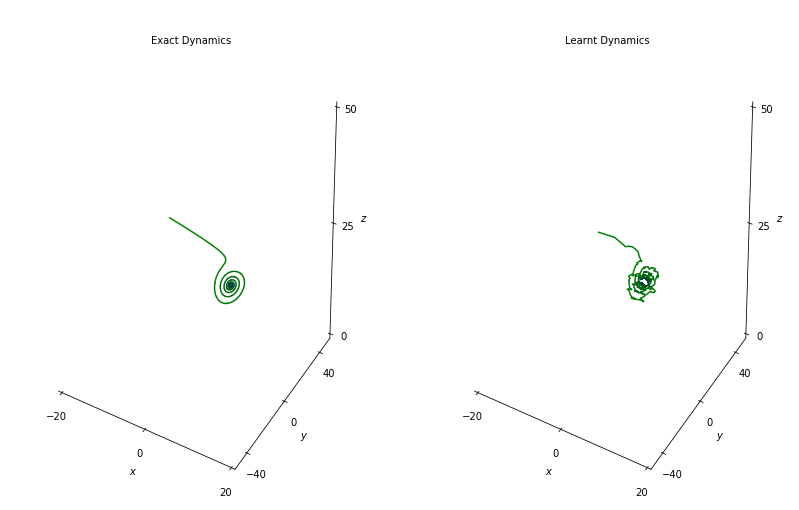

In [50]:
time_points = np.arange(0,25,0.01)
_data_test_two = simulate(time_points, x0, 0, 33.5, 2.5, 18.5)
testDynamics(_data_test_two)

MSE:2.67


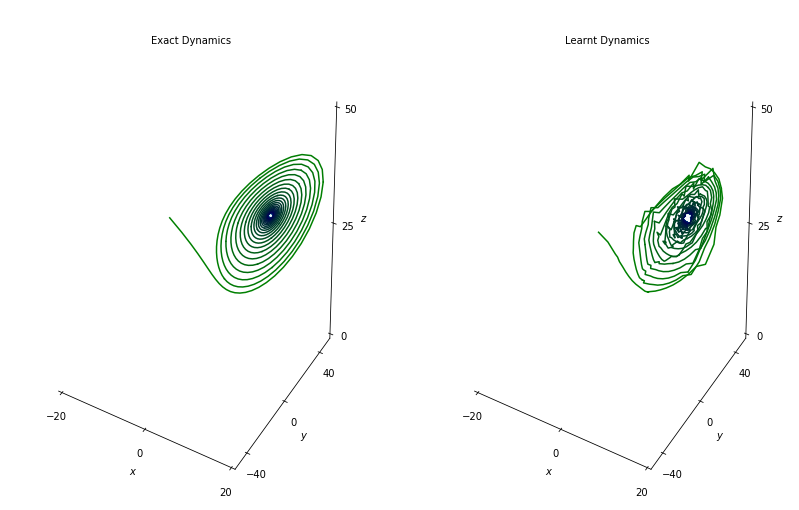

In [52]:
_data_test_three = simulate(time_points, x0, 0, 23.0, 5.9, 34.5)
testDynamics(_data_test_three )

## Complex Valued networks

### Unitary Evolution RNN

In [64]:
#from URNN import URNNCell
from complex_valued_models.SimpleURNN import SimpleURNNCell
tf.reset_default_graph()

n_steps = 10 #number of periods per vector we are using to predict one period ahead
n_inputs = 3 #number of vectors submitted
n_neurons = 25 #number of neurons we will recursively work through, can be changed to improve accuracy
n_outputs = 3 #number of output vectors

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

basic_cell = SimpleURNNCell(num_units=n_neurons, num_in=3)
rnn_outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #Choose dynamic over static

learning_rate = 0.01 # Small learning rate so we don't overshoot the minimum

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, 2*n_neurons]) #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #specify the type of layers
urnn_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #shape of results

loss = tf.reduce_mean(tf.square(urnn_outputs-y)) #define the cost function

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) #gradient descent method
training_op = optimizer.minimize(loss) #train the result of the application of the cost function

init = tf.global_variables_initializer() # initialize all the variables

In [65]:
def reshape_dataset(data_set):
    data_set = data_set.reshape(int(samples/timesteps),timesteps,dim)
    return data_set
train_data = reshape_dataset(_data_train)
x_batches, y_batches = train_data, train_data
test_one = reshape_dataset(_data_test_one)
test_two = reshape_dataset(_data_test_two)
test_three = reshape_dataset(_data_test_three)
print(x_batches.shape, y_batches.shape)

(250, 10, 3) (250, 10, 3)


In [66]:
n_iterations =1500
batch_size = 50
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(iteration, "\MSE:", mse)
            
    y_pred_one = sess.run(urnn_outputs, feed_dict={X: test_one})
    y_pred_two = sess.run(urnn_outputs, feed_dict={X: test_two})
    y_pred_three = sess.run(urnn_outputs, feed_dict={X: test_three})

0 \MSE: 650.42114
100 \MSE: 0.48534968
200 \MSE: 0.15350826
300 \MSE: 0.07344644
400 \MSE: 0.047530644
500 \MSE: 0.034988128
600 \MSE: 0.027285123
700 \MSE: 0.021872636
800 \MSE: 0.017737195
900 \MSE: 0.014386397
1000 \MSE: 0.01158317
1100 \MSE: 0.009222629
1200 \MSE: 0.0072390046
1300 \MSE: 0.005588684
1400 \MSE: 0.004246773


MSE:0.04


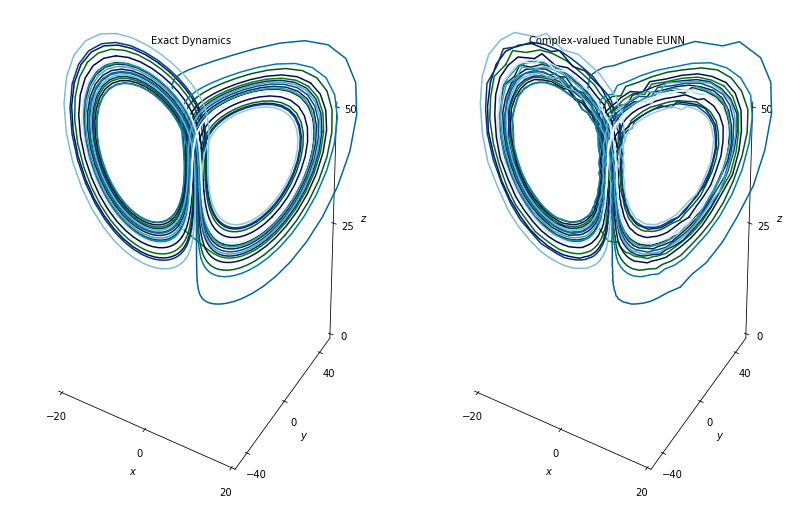

In [87]:
# initial condition
def test_dynamics_complex(test_data, yhat):
    yhat.shape = (samples, dim)
    test_data.shape = (samples, dim)
    plotComparison(test_data, 'Exact Dynamics', yhat, 'Complex-valued Tunable EUNN')
    mse = mean_squared_error(test_data, yhat)
    print("MSE:%.2f" % mse)
    
test_dynamics_complex(test_one, y_pred_one)

MSE:0.00


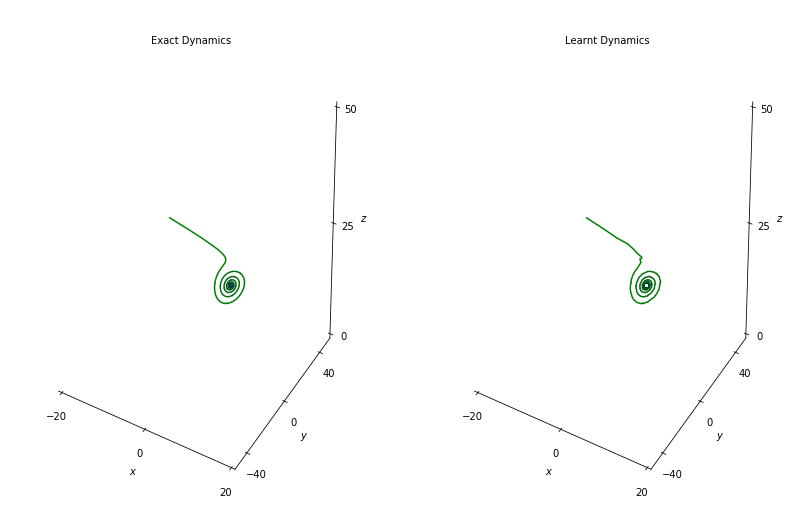

In [69]:
test_dynamics_complex(test_two, y_pred_two)

### Tunable Efficient Unitary RNN

In [94]:
tf.reset_default_graph()

n_steps = 10 #number of periods per vector we are using to predict one period ahead
n_inputs = 3 #number of vectors submitted
n_neurons = 50 #number of neurons we will recursively work through, can be changed to improve accuracy
n_outputs = 3 #number of output vectors

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

#basic_cell = rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = ComplexRNNCell(n_neurons, 2)
hidden_out_comp, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.complex64) #Choose dynamic over static
rnn_outputs = tf.real(hidden_out_comp)


learning_rate = 0.0001 # 3e-5Small learning rate so we don't overshoot the minimum

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #specify the type of layers
eurnn_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #shape of results

loss = tf.reduce_mean(tf.square(eurnn_outputs-y)) #define the cost function

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, decay=0.7) #gradient descent method
training_op = optimizer.minimize(loss) #train the result of the application of the cost function

init = tf.global_variables_initializer() # initialize all the variables

In [95]:
test_one = reshape_dataset(_data_test_one)
test_two = reshape_dataset(_data_test_two)
test_three = reshape_dataset(_data_test_three)
n_iterations =2000
batch_size = 50
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(iteration, "\MSE:", mse)
            
    y_pred_one = sess.run(eurnn_outputs, feed_dict={X: test_one})
    y_pred_two = sess.run(eurnn_outputs, feed_dict={X: test_two})
    y_pred_three = sess.run(eurnn_outputs, feed_dict={X: test_three})

0 \MSE: 500.5565
100 \MSE: 234.36726
200 \MSE: 116.57939
300 \MSE: 59.120876
400 \MSE: 32.49185
500 \MSE: 17.793684
600 \MSE: 9.540166
700 \MSE: 4.8481374
800 \MSE: 2.401124
900 \MSE: 1.3024665
1000 \MSE: 0.7992967
1100 \MSE: 0.5250289
1200 \MSE: 0.35689923
1300 \MSE: 0.25018567
1400 \MSE: 0.18025886
1500 \MSE: 0.13343942
1600 \MSE: 0.10059093
1700 \MSE: 0.07675568
1800 \MSE: 0.059920195
1900 \MSE: 0.048150238


MSE:0.04


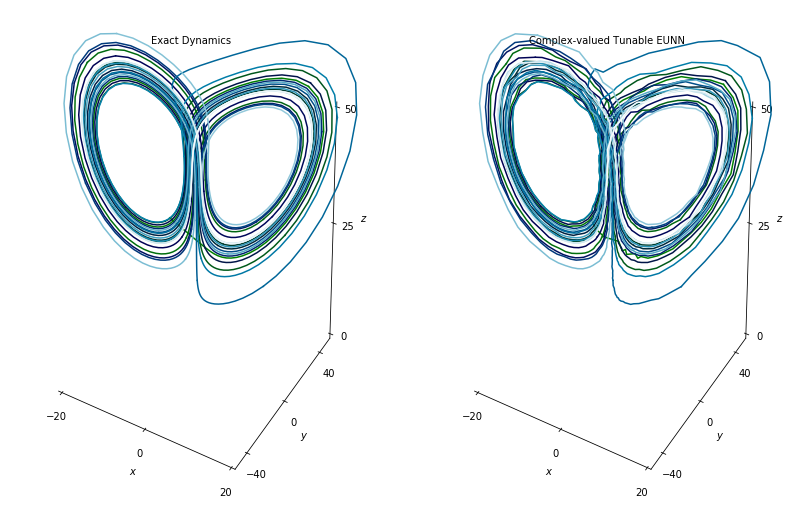

In [96]:
test_dynamics_complex(test_one, y_pred_one)

MSE:0.01
MSE:0.03


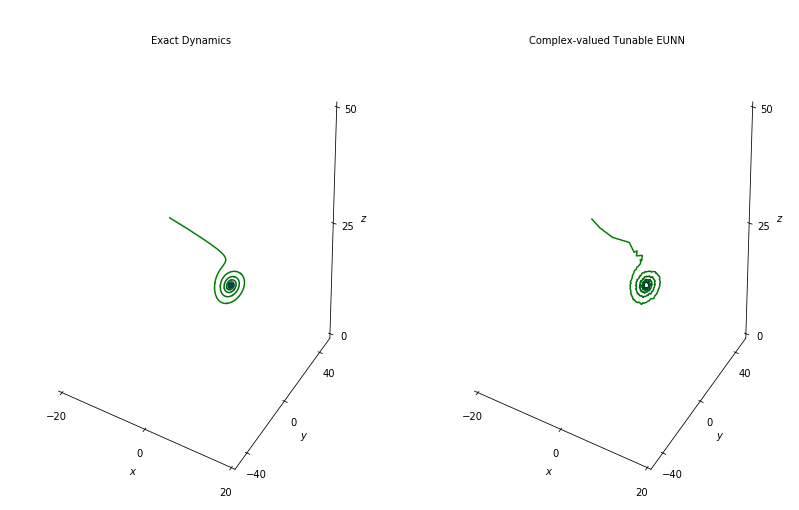

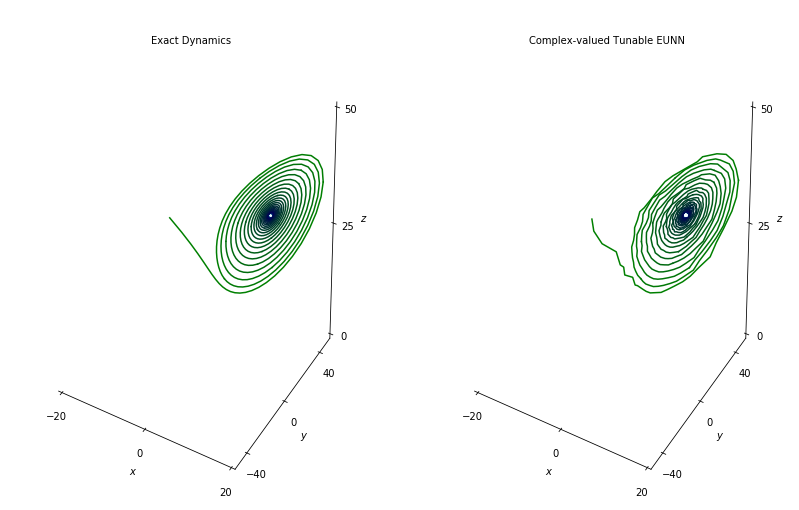

In [97]:
test_dynamics_complex(test_two, y_pred_two)
test_dynamics_complex(test_three, y_pred_three)